<a href="https://colab.research.google.com/github/Deepthi-AJ/Challenges-1-2/blob/main/Kaggle_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pixeltests School Data Science, Unit 2_

---

👇 **Do not change the code in this cell.** If you're working in Google Colab, you can run this cell to install `category_encoders`.

In [64]:
%%capture
import sys

if 'google.colab' in sys.modules:
    # Install packages in Colab
    !pip install category_encoders


# Sprint Challenge: Predict Steph Curry's Shots 🏀

For your Sprint Challenge, you'll use a dataset with all Steph Curry's NBA field goal attempts from October 2009 through June 2019 (regular season and playoffs). The dataset was collected with the [nba_api](https://github.com/swar/nba_api) Python library.

You'll create a model to predict whether Curry will make a shot based on his past perfomance.

# Directions

This notebook contains 10 tasks, which cover the material we've learned in this sprint. Here's a summary:

- **Task 1:** Importing data.
- **Task 2:** Feature engineering.
- **Task 3:** Splitting data into a feature matrix and target vector.
- **Task 4:** Splitting data into training, validation, and test sets.
- **Task 5:** Establishing baseline accuracy.
- **Task 6:** Building a model with a transformer and a tree-based predictor.
- **Task 7:** Calculating training and validation accuracy.
- **Task 8 (`stretch goal`):** Tuning model hyperparameters.
- **Task 9:** Calculating precision and recall from a confusion matrix.
- **Task 10 (`stretch goal`):** Plotting a confusion matrix.

For each task you should do the following:

- Read the task instructions.
- Write your code in the cell below the task. Delete the `raise
NotImplementedError` before your start.
- Run the testing cell below the task. If you get an error, read the error message and re-evaluate your code.

**You should limit your code to the following libraries:**

- `category_encoders`
- `numpy`
- `matplotlib`
- `pandas`
- `sklearn`



# I. Wrangle Data

**Task 1:** Change the code below to import your dataset. Be sure to examine the columns carefully and determine if one of them should be set at the index.

In [65]:
'''T1. Import DataFrame `df`'''

import pandas as pd
url = 'https://drive.google.com/uc?export=download&id=1fL7KPyxgGYfQDsuJoBWHIWwCAf-HTFpX'
df = pd.read_csv(url)
# YOUR CODE HERE
df.head().T
# raise NotImplementedError()

,0,1,2,3,4
game_id,20900015,20900015,20900015,20900015,20900015
game_event_id,4,17,53,141,249
player_name,Stephen Curry,Stephen Curry,Stephen Curry,Stephen Curry,Stephen Curry
period,1,1,1,2,2
minutes_remaining,11,9,6,9,2
seconds_remaining,25,31,2,49,19
action_type,Jump Shot,Step Back Jump shot,Jump Shot,Jump Shot,Jump Shot
shot_type,3PT Field Goal,2PT Field Goal,2PT Field Goal,2PT Field Goal,2PT Field Goal
shot_zone_basic,Above the Break 3,Mid-Range,In The Paint (Non-RA),Mid-Range,Mid-Range
shot_zone_area,Right Side Center(RC),Left Side Center(LC),Center(C),Left Side(L),Left Side Center(LC)


In [66]:
type(df.index)

pandas.core.indexes.range.RangeIndex

In [67]:
df.shape #(13958, 20)

(13958, 20)

In [68]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
game_id,13958.0,NaN,NaN,NaN,24428365.364594,7226619.758653,20900015.0,21200912.0,21500259.0,21700963.0,41800403.0
game_event_id,13958.0,NaN,NaN,NaN,270.438458,169.92717,2.0,109.0,275.5,398.0,752.0
player_name,13958,1,Stephen Curry,13958,NaN,NaN,NaN,NaN,NaN,NaN,NaN
period,13958.0,NaN,NaN,NaN,2.41238,1.125828,1.0,1.0,2.0,3.0,6.0
minutes_remaining,13958.0,NaN,NaN,NaN,4.72754,3.331646,0.0,2.0,4.0,7.0,11.0
seconds_remaining,13958.0,NaN,NaN,NaN,28.506376,17.597701,0.0,13.0,29.0,44.0,59.0
action_type,13958,53,Jump Shot,6657,NaN,NaN,NaN,NaN,NaN,NaN,NaN
shot_type,13958,2,2PT Field Goal,7135,NaN,NaN,NaN,NaN,NaN,NaN,NaN
shot_zone_basic,13958,7,Above the Break 3,5695,NaN,NaN,NaN,NaN,NaN,NaN,NaN
shot_zone_area,13958,6,Center(C),5987,NaN,NaN,NaN,NaN,NaN,NaN,NaN


For setting index, you need values that are unique. Here not completely unique values in any of the columns in the df.

**Task 1 Testing**

In [69]:
'''T1 Testing'''

assert isinstance(df, pd.DataFrame), 'Have you created a DataFrame named `df`?'
assert len(df) == 13958, 'Is `df` the correct length?'


**Task 2a:** Engineer at least 1 new feature. You can use something from the list below or your own idea.

- **Homecourt Advantage**: Is the home team (`htm`) the Golden State Warriors (`GSW`) ?
- **Opponent**: Who is the other team playing the Golden State Warriors?
- **Seconds remaining in the period**: Combine minutes remaining with seconds remaining, to get the total number of seconds remaining in the period.
- **Seconds remaining in the game**: Combine period, and seconds remaining in the period, to get the total number of seconds remaining in the game. A basketball game has 4 periods, each 12 minutes long.
- **Made previous shot**: Was Steph Curry's previous shot successful?

**Task 2b (`stretch goal — optional`):** Create a total of 3 new features, using your own ideas or the list above. Make sure you're not just duplicating features that are already in the feature matrix.

In [70]:
"""T2. Create new feature"""

# YOUR CODE HERE
df['htm'].value_counts()
# Homecourt Advantage: Is the home team (htm) the Golden State Warriors (GSW) ?
# Yes, since GSW is the most frequently occuring value in the dataset

# raise NotImplementedError()

GSW    6871
HOU     440
POR     411
LAC     390
MEM     351
OKC     349
CLE     320
SAC     314
DEN     303
SAS     295
UTA     294
PHX     293
NOP     274
MIN     270
DAL     266
LAL     252
TOR     186
WAS     183
CHA     173
PHI     172
MIA     164
ORL     162
ATL     160
NYK     160
BOS     151
BKN     146
CHI     141
MIL     133
DET     124
IND     109
NOH      73
NJN      28
Name: htm, dtype: int64

In [71]:
df['vtm'].value_counts()

GSW    7087
HOU     471
LAC     398
POR     398
OKC     397
CLE     364
SAS     343
MEM     316
PHX     301
DEN     298
MIN     283
LAL     280
NOP     265
UTA     262
SAC     225
DAL     222
TOR     187
WAS     168
NYK     168
CHI     165
PHI     157
DET     152
BOS     136
CHA     132
MIA     128
IND     125
ORL     121
MIL     117
BKN     110
ATL      93
NOH      58
NJN      31
Name: vtm, dtype: int64

In [72]:
df['secs_remaining'] = df['seconds_remaining'] + 60 * df['minutes_remaining']
df['secs_remaining'].head()

0    685
1    571
2    362
3    589
4    139
Name: secs_remaining, dtype: int64

In [73]:
df.shape

(13958, 21)

In [74]:
df['total_secs_remaining'] = df['seconds_remaining'] + df['period'] * 12 * 60
df['total_secs_remaining'].head()

0     745
1     751
2     722
3    1489
4    1459
Name: total_secs_remaining, dtype: int64

In [75]:

df['prev_shot_success'] = df['shot_made_flag'].shift(1)
df['prev_shot_success'].fillna(0, inplace= True)
df['prev_shot_success'].head()


0    0.0
1    0.0
2    1.0
3    0.0
4    0.0
Name: prev_shot_success, dtype: float64

In [76]:
df.shape

(13958, 23)

**Task 2 Test**

In [77]:
'''T2 Testing'''

assert df.shape[1] >= 20, '`df` does not appear to have new features.'


# II. Split Data

**Task 3:** Divide the DataFrame `df` into the feature matrix `X` and the target vector `y`. Your target is `'shot_made_flag'`.

In [78]:
'''T3. Create `X` and `y`.'''
# YOUR CODE HERE
X = df.drop(['shot_made_flag'], axis = 1)
y = df['shot_made_flag']
# raise NotImplementedError()

**Task 3 Test**

In [79]:
'''T3 Tests'''

assert y.shape == (13958,), '`y` either has the wrong number of rows, or is two-dimentional.'
assert len(X) == 13958, '`X` has the wrong number of rows.'
assert X.shape[1] > 1, '`X` has the wrong number of columns'
assert 'shot_made_flag' not in X.columns, 'Target is still part of feature matrix.'

**Task 4:** Divide your dataset into training, validation, and test sets.

- Your training set (`X_train`, `y_train`) should contain games from the 2009-10 season through the end of the 2016-17 season.
- Your validation set (`X_val`, `y_val`) should contain games from the 2017-18 season.
- Your test set (`X_test`, `y_test`) should contain games from the 2018-2019 season.
- **Tip:** The NBA season begins in October and ends in June.

In [80]:
df['game_date']= pd.to_datetime(df['game_date'], infer_datetime_format=True)
print(df.dtypes)
df['game_date'].value_counts()

game_id                             int64
game_event_id                       int64
player_name                        object
period                              int64
minutes_remaining                   int64
seconds_remaining                   int64
action_type                        object
shot_type                          object
shot_zone_basic                    object
shot_zone_area                     object
shot_zone_range                    object
shot_distance                       int64
loc_x                               int64
loc_y                               int64
shot_made_flag                      int64
game_date                  datetime64[ns]
htm                                object
vtm                                object
season_type                        object
scoremargin_before_shot           float64
secs_remaining                      int64
total_secs_remaining                int64
prev_shot_success                 float64
dtype: object


2013-05-06    35
2019-02-28    33
2016-05-09    32
2013-12-09    32
2019-01-13    32
              ..
2009-12-28     4
2019-04-09     4
2012-03-11     3
2010-12-08     2
2018-03-08     1
Name: game_date, Length: 801, dtype: int64

In [81]:
df.set_index('game_date' , inplace=True)
df.sort_index()

,game_id,game_event_id,player_name,period,minutes_remaining,seconds_remaining,action_type,shot_type,shot_zone_basic,shot_zone_area,...,loc_x,loc_y,shot_made_flag,htm,vtm,season_type,scoremargin_before_shot,secs_remaining,total_secs_remaining,prev_shot_success
game_date,,,,,,,,,,,,,,,,,,,,,
2009-10-28,20900015,4,Stephen Curry,1,11,25,Jump Shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),...,99,249,0,GSW,HOU,Regular Season,2.0,685,745,0.0
2009-10-28,20900015,17,Stephen Curry,1,9,31,Step Back Jump shot,2PT Field Goal,Mid-Range,Left Side Center(LC),...,-122,145,1,GSW,HOU,Regular Season,0.0,571,751,0.0
2009-10-28,20900015,53,Stephen Curry,1,6,2,Jump Shot,2PT Field Goal,In The Paint (Non-RA),Center(C),...,-60,129,0,GSW,HOU,Regular Season,-4.0,362,722,1.0
2009-10-28,20900015,141,Stephen Curry,2,9,49,Jump Shot,2PT Field Goal,Mid-Range,Left Side(L),...,-172,82,0,GSW,HOU,Regular Season,-4.0,589,1489,0.0
2009-10-28,20900015,249,Stephen Curry,2,2,19,Jump Shot,2PT Field Goal,Mid-Range,Left Side Center(LC),...,-68,148,0,GSW,HOU,Regular Season,0.0,139,1459,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-05,41800403,570,Stephen Curry,4,8,1,Pullup Jump shot,2PT Field Goal,In The Paint (Non-RA),Center(C),...,3,120,1,GSW,TOR,Playoffs,-13.0,481,2881,1.0
2019-06-05,41800403,573,Stephen Curry,4,7,16,Floating Jump shot,2PT Field Goal,Mid-Range,Right Side(R),...,114,-5,0,GSW,TOR,Playoffs,-14.0,436,2896,1.0
2019-06-05,41800403,602,Stephen Curry,4,5,27,Step Back Jump shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),...,-217,149,0,GSW,TOR,Playoffs,-17.0,327,2907,0.0


In [82]:
train = df['2006-01-01' : '2017-06-30'] #((11081, 23)
val = df['2017-07-01' : '2018-06-30'] #(1168, 23)
test = df['2018-07-01' :] #(1709, 23))

In [83]:
train.shape, val.shape, test.shape

((11081, 22), (1168, 22), (1709, 22))

In [84]:
X_train = train.drop('shot_made_flag', axis = 1)
y_train = train['shot_made_flag']
X_val = val.drop('shot_made_flag', axis = 1)
y_val = val['shot_made_flag']
X_test = test.drop('shot_made_flag', axis = 1)
y_test = test['shot_made_flag']

In [85]:
'''T4. Create training and val'''
# YOUR CODE HERE
# from sklearn.model_selection import train_test_split
# X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
# raise NotImplementedError()

'T4. Create training and val'

**Test 4**

In [86]:
'''T4 Tests'''
assert len(X_train) == len(y_train) == 11081
assert len(X_val) == len(y_val) == 1168
assert len(X_test) == len(y_test) == 1709


# III. Establish Baseline

**Task 5:** Establish the baseline accuracy score for this classification problem using your training set. Save the score to the variable `baseline_acc`.

In [87]:
#majority class is 0, how to calculate baseline

In [88]:
'''T5. Calculate baseline accuracy `baseline_acc`.'''

# YOUR CODE HERE
from sklearn.metrics import accuracy_score
import numpy as np
y_pred = pd.DataFrame(np.zeros(len(X_train,),dtype=int))
baseline_acc = accuracy_score(y_pred, y_train)
# raise NotImplementedError()
print('Baseline Accuracy:', baseline_acc)

Baseline Accuracy: 0.5272087356736757


**Task 5 Testing**

In [89]:
'''T5 Testing'''

assert isinstance(baseline_acc, float)
assert 0.0 <= baseline_acc <= 1.0


# IV. Build Model

**Task 6:** Build a model that includes (1) a transformer for categorical features and (2) a tree-based predictor. You should combine these two components (and any other pieces you think are necessary) in a pipeline named `model`. Be sure to fit your model to your training data.

In [90]:
'''T6. Build a pipeline `model` with encoder and tree-based predictor.'''

# YOUR CODE HERE
from sklearn.ensemble import RandomForestClassifier
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
# model_rf

model = make_pipeline(ce.OrdinalEncoder(),
                         SimpleImputer(strategy='mean'),
                         StandardScaler(),
                         RandomForestClassifier(random_state = 41))

model.fit(X_train, y_train)
# raise NotImplementedError()

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['player_name', 'action_type', 'shot_type',
                                      'shot_zone_basic', 'shot_zone_area',
                                      'shot_zone_range', 'htm', 'vtm',
                                      'season_type'],
                                mapping=[{'col': 'player_name',
                                          'data_type': dtype('O'),
                                          'mapping': Stephen Curry    1
NaN             -2
dtype: int64},
                                         {'col': 'action_type',
                                          'data_type': dtype('O'),
                                          'mapping': Jump Shot                              1
Step Back Jump shot                    2
P...
BOS    13
SAC    14
CLE    15
MIA    16
MIL    17
CHI    18
DEN    19
NJN    20
NOH    21
CHA    22
OKC    23
DAL    24
UTA    25
ATL    26
PHI    27
DET    28
TOR    29
NYK    30
BKN    31
NOP    32
NaN    -2
dtype: int64},
                                         {'col': 'season_type',
                                          'data_type': dtype('O'),
                                          'mapping': Regular Season    1
Playoffs          2
NaN              -2
dtype: int64}])),
                ('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=41))])

**Task 6 Testing**

In [91]:
'''T6 Testing'''

from sklearn.pipeline import Pipeline
assert isinstance(model, Pipeline), '`model` should be type `Pipeline`.'

# Does `model` Pipeline have multiple components?
assert len(model.named_steps.keys()) > 1, '`model` should have more than one component.'

# Has `model` been trained?
assert hasattr(model, 'classes_'), 'Have you trained `model`?'


# V. Check Metrics

**Task 7:** Check the training and validation accuracy of your model, and assign the scores to `train_acc` and `val_acc` respectively.

In [92]:
'''T7. Calculate train and test accuracy.'''

# YOUR CODE HERE
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_train)
yval_pred = model.predict(X_val)
train_acc = accuracy_score(y_pred, y_train)
val_acc = accuracy_score(yval_pred, y_val)
# raise NotImplementedError()
print('Training Accuracy Score:', train_acc)
print('Validation Accuracy Score:', val_acc)

Training Accuracy Score: 1.0
Validation Accuracy Score: 0.5881849315068494


**Task 7 Test**

In [93]:
'''T7 Testing'''

# Is `training_acc` a float between 0.0 and 1.0?
assert isinstance(train_acc, float)
assert 0.0 <= train_acc <= 1.0

# Is `validation_acc` a float between 0.0 and 1.0?
assert isinstance(val_acc, float)
assert 0.0 <= val_acc <= 1.0


# VI. Tune Model

**Task 8 (`stretch goal — optional`):** Using your training and validation sets as a guide, tune the hyperparameters of your model to see if you can improve its accuracy. You can perform your tuning "by hand" or using [`RandomizedSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html).

- Important hyperparameters for all tree-based models: `max_depth`.
- Important hyperparameters for random forest models: `n_estimators`, `max_samples`.
- Important hyperparametes for gradient boosting tree models: `n_estimators`, `learning_rate`.
- **TIP:** If you use `RandomizedSearchCV`, set `n_iter` to `3`. Any larger and the auto-grader will stop working.
- **TIP:** Since you already created a validation set above, there is no need to do k-fold cross-validation here. Set `cv` to `None`.

Once you're satisfied with your model's performance on the validation set (if you can get above `0.6`, you're doing good), calculate its accuracy with your test set. Assign the result to `test_acc`.

In [120]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
'''T8. Tune model.'''

# YOUR CODE HERE

clf_rf = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    RandomForestClassifier(random_state = 42)
)

param_distributions = {
    'simpleimputer__strategy': ['mean', 'median'],
    'randomforestclassifier__bootstrap': [True, False],
    # 'max_depth': [10,20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    # 'randomeforestclassifier_max_depth': [10, 50],
    # 'max_features': ['auto', 'sqrt'],
    # 'min_samples_leaf': [1,2,4],
    # 'min_samples_split': [2, 5, 10],
    # 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
}

search = RandomizedSearchCV(
    clf_rf,
    param_distributions = param_distributions,
    n_iter = 3,
    cv = None, #no need for k-fold cross-validation here
    scoring = 'accuracy',
    verbose = 10,
    return_train_score = True,
    n_jobs = -1
)

search.fit(X_train, y_train)
# raise NotImplementedError()
# print('Testing Accuracy Score:', test_acc)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


RandomizedSearchCV(estimator=Pipeline(steps=[('ordinalencoder',
                                              OrdinalEncoder()),
                                             ('simpleimputer', SimpleImputer()),
                                             ('standardscaler',
                                              StandardScaler()),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(random_state=42))]),
                   n_iter=3, n_jobs=-1,
                   param_distributions={'randomforestclassifier__bootstrap': [True,
                                                                              False],
                                        'simpleimputer__strategy': ['mean',
                                                                    'median']},
                   return_train_score=True, scoring='accuracy', verbose=10)

In [99]:
print("Best hyperparameters ", search.best_params_)
print("Cross_validation accuracy ", search.best_score_)

Best hyperparameters  {'simpleimputer__strategy': 'mean', 'randomforestclassifier__bootstrap': True}
Cross_validation accuracy  0.6271089497141388


In [104]:
train_acc_search = accuracy_score(search.predict(X_train), y_train)
val_acc_search = accuracy_score(search.predict(X_val), y_val)
test_acc = accuracy_score(search.predict(X_test), y_test)

print("Training accuracy score", train_acc_search)
print("Validation accuracy score", val_acc_search)
print("Test accuracy score", test_acc)

Training accuracy score 1.0
Validation accuracy score 0.5993150684931506
Test accuracy score 0.6184903452311293


**Task 8 Testing**

In [105]:
'''T8 Testing'''
assert isinstance(test_acc, float)
assert 0.0 <= test_acc <= 1.0

# VII. Communication

**Task 9:** Below is a confusion matrix for the model that your instructor made for this challenge (based on the **test data**). Calculate the precision and recall of this model, naming them `instructor_precision` and `instructor_recall`, respectively.

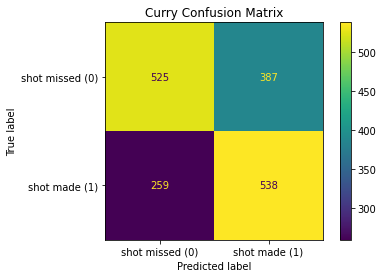

In [106]:
'''T9. Calculate precision and recall'''
# YOUR CODE HERE
correct_pred_shot_made = 538
total_pred_shot_made = 538 + 387
actual_shot_made = 259 + 538

instructor_precision = 538 / (538 + 387)
instructor_recall = 538 / (259 + 538)

# raise NotImplementedError()
print('Instuctor model precision', instructor_precision)
print('Instuctor model recall', instructor_recall)

Instuctor model precision 0.5816216216216217
Instuctor model recall 0.6750313676286073


In [110]:
from sklearn.metrics import classification_report

print(classification_report(y_test, search.predict(X_test)))

# Both precision., recall are significantly lesser

              precision    recall  f1-score   support

           0       0.64      0.66      0.65       912
           1       0.60      0.57      0.58       797

    accuracy                           0.62      1709
   macro avg       0.62      0.62      0.62      1709
weighted avg       0.62      0.62      0.62      1709



**Task 9 Testing**

In [107]:
'''T9 Testing'''
assert isinstance(instructor_precision, float)
assert isinstance(instructor_recall, float)
assert 0 <= instructor_precision <= 1
assert 0 <= instructor_recall <= 1

**Task 10 (`stretch goal — optional`):** Plot confusion matrix for your model using your **test data**. Does your model have higher recall or higher precision? How does your model's metrics compare to the metrics you calculated above?

In [124]:
# '''T10. Plot ROC curve.'''
# # YOUR CODE HERE
# import matplotlib.pyplot as plt
# from sklearn.metrics import RocCurveDisplay

# rfc = RandomForestClassifier(n_estimators=10, random_state=42)
# X_train.drop(['']
# rfc.fit(X_train, y_train)

# ax = plt.gca()
# rfc_disp = RocCurveDisplay.from_estimator(rfc, X_test, y_test, ax=ax, alpha=0.8)
# rfc_disp.plot(ax=ax, alpha=0.8)
# plt.show()
# # raise NotImplementedError()

ValueError: ignored

In [ ]:
#